# Calculation of self-similarity curves: Caenorhabditis elegans

# Table of Contents
* [General](#first-bullet)
* [Load paths](#second-bullet)
* [Load model](#third-bullet)
* [Calculate embeddings and similarities](#fourth-bullet)
* [Plot similarities as 2D matrix](#fifth-bullet)

## General <a class="anchor" id="first-bullet"></a>

General imports and class definitions

In [1]:
%load_ext autoreload
%autoreload 2

Import Python packages

In [2]:
import glob
from IPython.display import HTML, Image,SVG,display
import matplotlib as mpl
import pandas as pd
from pathlib import Path
import sys

from twinnet_tools.tnautoregression import TNToolsAutoregression
from twinnet_tools.tngeneral import TNToolsGeneral
from twinnet_tools.tninference import TNToolsEmbeddings
from twinnet_tools.tninference import TNToolsImages
from twinnet_tools.tninference import TNToolsSimilarities
from twinnet_tools.tnmodel import TNToolsNetwork
from twinnet_tools.tnplot import TNToolsPlot

from twinnet_tools.tnconfig import ProjectConfig

Load config file and paths from config file

In [3]:
config = ProjectConfig("twinnet_config")

ProjectConfig: C:\Users\TwinNetworkTest\Documents\TwinNetworkTest\code\Scripts\twinnet_config\Windows\config.json


In [4]:
path_model_celegans = config.json["path_model_celegans"]

config_paths_script = config.json["Autoregression_celegans"]
dir_data = config_paths_script["dir_data_src"]
path_src_data_test_json = config_paths_script["path_src_data_test_json"]
path_dst = config_paths_script["dir_data_dst"]

Prepare class instances

In [5]:
tools_autoregression = TNToolsAutoregression()
tools_general = TNToolsGeneral()
tools_embeddings = TNToolsEmbeddings(size_img=224, size_img_min=300)
tools_model = TNToolsNetwork()
tools_similarities = TNToolsSimilarities()
tools_plot = TNToolsPlot()

Adjust matplotlib parameters to save plots as .svg files.

In [6]:
new_rc_params = {'text.usetex': False,
                'svg.fonttype': 'none'}
mpl.rcParams.update(new_rc_params)

## Load paths <a class="anchor" id="second-bullet"></a>

Load test data paths

In [7]:
embryos_test = [f"{dir_data}/{p}/".replace('//', '/').replace('./', '') 
                for p in sorted(tools_general.fn_json_load(
                    path_src_data_test_json)['normal_bright_complete'])
               ]

In [8]:
embryo_test = embryos_test[0]

Specify directory to outputs

In [9]:
dir_dst_similarities = f"{path_dst}/similarities"

dir_dst_similarities_path = Path( dir_dst_similarities )
dir_dst_similarities_path.mkdir(parents=True, exist_ok=True)

## Load model <a class="anchor" id="third-bullet"></a>

In [10]:
tn_model_embedding = tools_model.tn_embedding_load(path_model_celegans)

## Calculate embeddings and similarities <a class="anchor" id="fourth-bullet"></a>

Load image paths

In [11]:
paths_imgs = [p.replace("\\", "/") 
              for p in
              sorted(glob.glob(f"{embryo_test}/*.tif"))]

Load images and calculate embeddings

In [12]:
embeddings_test = tools_embeddings.list_to_embeddings(paths_imgs, tn_model_embedding)

[DONE][Embeddings] 0006/0006                      


Calculate similarities

In [13]:
similarities_test = tools_similarities.cosine_similarities_self(embeddings_test)

Save similarities

In [14]:
num_imgs = len(paths_imgs)

similarities_test_array = tools_autoregression.fn_2d_sims_to_arrays(
    similarities_test,
    num_imgs
)

tools_general.fn_mat_write({"similarities_test": similarities_test_array},
                           f"{dir_dst_similarities}/TN_prediction_similarities.mat")

## Plot similarities as 2D matrix <a class="anchor" id="fifth-bullet"></a>

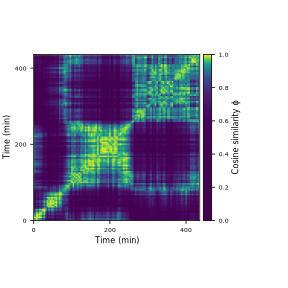

In [15]:
tools_plot.plot_similarity_self_2d(similarities_test,
                                   color_adjust=True,
                                   lamb=0.1,
                                   path_save=f"{path_dst}/TN_prediciton_similarities_self.svg")

display(SVG(filename=f"{path_dst}/TN_prediciton_similarities_self.svg"))